#### Stock price prediction

In [107]:
#Libraries
import numpy as np
import pandas as pds
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt

In [108]:
## Extracting the data
data_X = pds.read_csv('x_train.csv')
data_Y = pds.read_csv('y_train.csv')
data_X.head(n=10)

Y = data_Y.values
X = data_X.values
print(Y.shape)
print(X.shape)

(1257, 1)
(1257, 1)


In [109]:
## Preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_Train = sc.fit_transform(X)
Y_Train = sc.transform(Y)
print(X_Train[:5])
print(Y[:5])

## Converting into (batch.features)
X_Train = X_Train.reshape((X_Train.shape[0],X_Train.shape[1],1))
print(X_Train.shape)

[[0.09640129]
 [0.09834351]
 [0.09251685]
 [0.08881917]
 [0.07671765]]
[[333.87]
 [330.75]
 [328.77]
 [322.29]
 [315.72]]
(1257, 1, 1)


In [110]:
model = Sequential()
model.add(LSTM(16,input_shape = (None,1),return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(3,input_shape = (1,1)))
model.add(Dense(1))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, None, 16)          1152      
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 3)                 240       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 4         
Total params: 1,396
Trainable params: 1,396
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['acc'])
hist = model.fit(X_Train,Y_Train, epochs = 10, batch_size = 32)

Epoch 1/10
1257/1257 [==============================] - 1s 778us/step - loss: 0.2663 - acc: 7.9554e-04
Epoch 2/10
1257/1257 [==============================] - 0s 103us/step - loss: 0.1882 - acc: 7.9554e-04
Epoch 3/10
1257/1257 [==============================] - 0s 100us/step - loss: 0.1130 - acc: 7.9554e-04
Epoch 4/10
1257/1257 [==============================] - 0s 100us/step - loss: 0.0583 - acc: 7.9554e-04
Epoch 5/10
1257/1257 [==============================] - 0s 110us/step - loss: 0.0396 - acc: 0.0016
Epoch 6/10
1257/1257 [==============================] - 0s 111us/step - loss: 0.0343 - acc: 0.0016
Epoch 7/10
1257/1257 [==============================] - 0s 127us/step - loss: 0.0290 - acc: 0.0016
Epoch 8/10
1257/1257 [==============================] - 0s 121us/step - loss: 0.0233 - acc: 0.0016
Epoch 9/10
1257/1257 [==============================] - 0s 117us/step - loss: 0.0172 - acc: 0.0016
Epoch 10/10
1257/1257 [==============================] - 0s 117us/step - loss: 0.0144 - acc: 

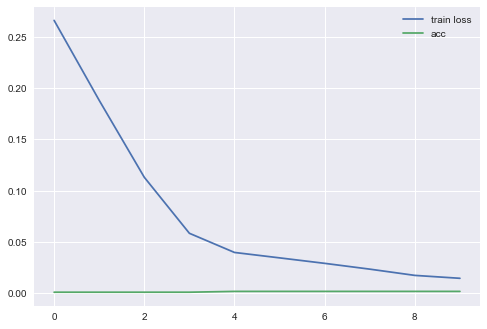

In [112]:
plt.style.use("seaborn")
plt.plot(hist.history['loss'], label = "train loss")
plt.plot(hist.history['acc'], label="acc")
plt.legend()
plt.show()

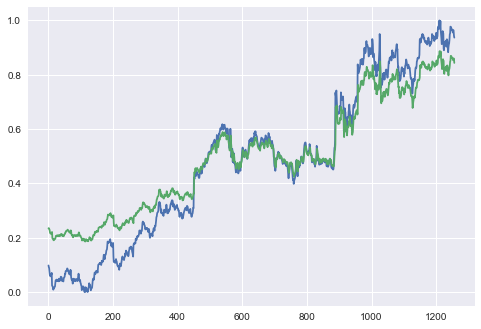

In [113]:
y_pred = model.predict(X_Train)
plt.plot(Y_Train)
plt.plot(y_pred)
plt.show()

In [114]:
model.evaluate(X_Train,Y_Train)

1257/1257 [==============================] - 0s 173us/step


[0.007312720105909226, 0.0015910898800939322]

#### LSTM with more time steps

In [94]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(X)
print(scaled_data.shape)

(1257, 1)


In [95]:
x_train, y_train = [], []
for i in range(40,len(scaled_data)):
    x_train.append(scaled_data[i-40:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1217, 40)
(1217,)


In [96]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)
print(x_train[0].shape)

(1217, 40, 1)
(40, 1)


In [104]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=32))
model.add(Dense(1))
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
hist = model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=1)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 40, 64)            16896     
_________________________________________________________________
lstm_33 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1217/1217 [==============================] - 42s 34ms/step - loss: 0.0030 - acc: 0.0016
Epoch 2/2
1217/1217 [==============================] - 37s 30ms/step - loss: 0.0013 - acc: 0.0016


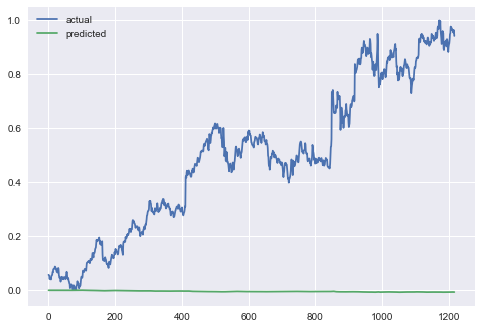

In [105]:
y_pred = model_new.predict(x_train)
plt.plot(y_train,label="actual")
plt.plot(y_pred,label="predicted")
plt.legend()
plt.show()

In [106]:
model_new.evaluate(x_train,y_train)

1217/1217 [==============================] - 1s 416us/step


0.3266144658063118